odruda,num,mean,median,min,max,sd,norm_test,sym_test
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,100,0.540800,0.52500,-0.57,1.7800,0.5492836,0.3559919,0.7101687
B,100,0.329400,0.28000,-0.62,1.3200,0.4592766,0.3339221,0.1576341
C,100,0.527305,0.51975,-0.73,1.6645,0.5494186,0.3962977,0.8597575
D,100,0.506700,0.48500,-0.70,1.5800,0.4626036,0.7489013,0.5377519



	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 6.0446, df = 3, p-value = 0.1095



	Kruskal-Wallis rank sum test

data:  zlepseni by odruda
Kruskal-Wallis chi-squared = 11.764, df = 3, p-value = 0.008237


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 11.764, df = 3, p-value = 0.01


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B          C
---------+---------------------------------
       B |   2.947975
         |    0.0192*
         |
       C |   0.154126  -2.793848
         |     1.0000    0.0313*
         |
       D |   0.326601  -2.621374   0.172474
         |     1.0000     0.0525     1.0000

alpha = 0.05
Reject Ho if p <= alpha


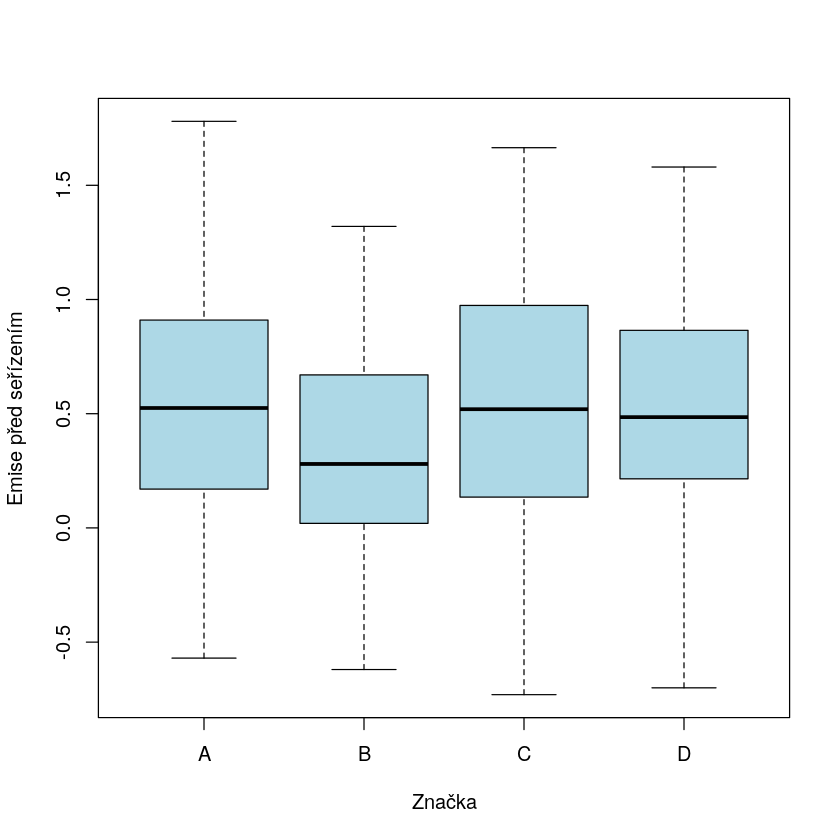

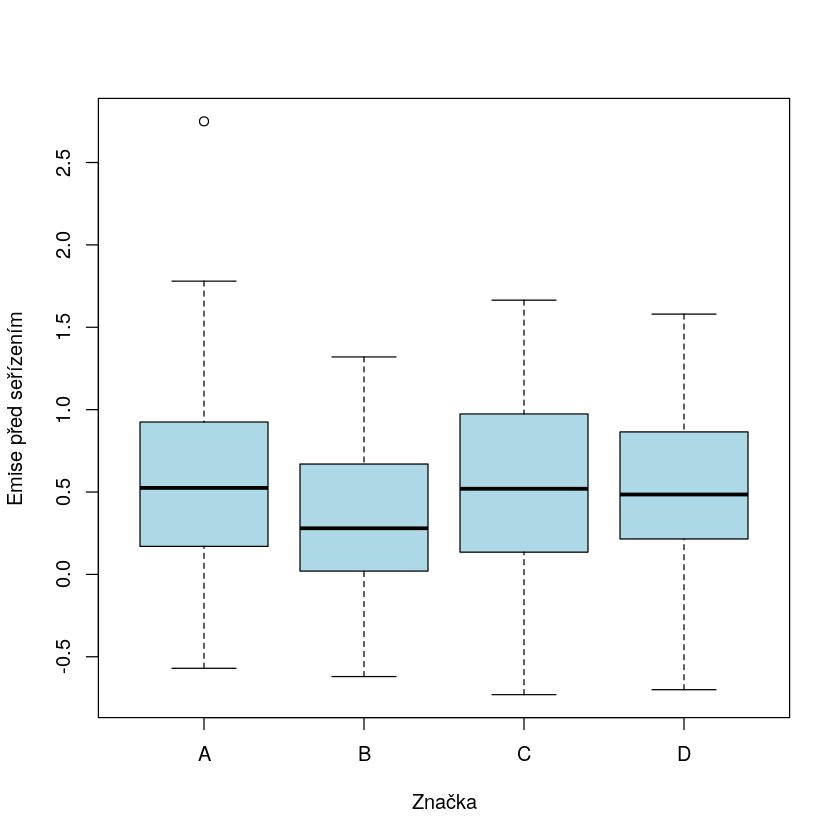

In [20]:
library(dplyr)
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(0)

# Počet motorů pro každou značku
n <- 100

# Generování dat
id <- 1:(4 * n)
odruda <- rep(c("A", "B", "C", "D"), each = n)
vynos_2024 <- round(rnorm(4 * n, mean = 8, sd = 0.6), 2) # emise před seřízením
vynos_2023 <- round(vynos_2024 - rnorm(4 * n, mean = 0.5, sd = 0.5), 2) # emise po seřízení
vynos_2023[odruda == "A"] <- vynos_2023[odruda == "A"] - 0.1 # zvýšení emisí pro značku X
vynos_2023[odruda == "B"] <- vynos_2023[odruda == "B"] + 0.1 # snížení emisí pro značku Y
vynos_2023[odruda == "C"] <- (vynos_2023[odruda == "C"] - 8) * 1.15 + 8 # zvýšení emisí pro značku Z
typ_hnojiva <- sample(c("synteticke", "prirodni"), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
vynos_2023[typ_hnojiva == "synteticke"] <- vynos_2023[typ_hnojiva == "synteticke"] + 0.1 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    odruda = odruda,
    vynos_2024 = vynos_2024,
    vynos_2023 = vynos_2023,
    typ_hnojiva = typ_hnojiva
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2024 - data$vynos_2023)

for (i in 1:4) {
    outliers <- data %>%
        group_by(odruda) %>%
        rstatix::identify_outliers(zlepseni)

    data$vynos_2024 <- ifelse(data$id %in% outliers$id, 8, data$vynos_2024)
    data$vynos_2023 <- ifelse(data$id %in% outliers$id, 8, data$vynos_2023)
    data <- na.omit(data)
}

data$zlepseni <- (data$vynos_2024 - data$vynos_2023)
boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(odruda) %>%
    summarise(
        num = n(),
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ odruda, data = data)
kruskal.test(zlepseni ~ odruda, data = data)
dunn.test::dunn.test(data$zlepseni, data$odruda, method = "bonferroni", altp = TRUE)

data$vynos_2023[16] <- 5

data1 <- data
data1$zlepseni <- (data1$vynos_2024 - data1$vynos_2023)
boxplot(data1$zlepseni ~ data1$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


In [23]:
data1 <- data1 %>% select(id,odruda,vynos_2023,vynos_2024,typ_hnojiva)
library(openxlsx)

write.xlsx(data1, file = "zk3A.xlsx", rowNames = FALSE)

-----


odruda,num,mean,median,min,max,sd,norm_test,sym_test
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,100,0.104000,0.06000,-1.2500,1.390,0.5742470,0.82726742,0.3111501
B,100,-0.038100,-0.04500,-1.3100,1.060,0.5067956,0.62550391,0.8551948
C,100,-0.021955,-0.02975,-1.5935,1.625,0.6473816,0.98402362,0.8713272
D,100,0.063200,0.11000,-1.1500,1.140,0.5708029,0.05441567,0.3029567



	Bartlett test of homogeneity of variances

data:  zlepseni by odruda
Bartlett's K-squared = 5.9009, df = 3, p-value = 0.1165



	Kruskal-Wallis rank sum test

data:  zlepseni by odruda
Kruskal-Wallis chi-squared = 3.7236, df = 3, p-value = 0.2929


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 3.7236, df = 3, p-value = 0.29


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          A          B          C
---------+---------------------------------
       B |   1.604870
         |     0.6511
         |
       C |   1.464199  -0.140670
         |     0.8588     1.0000
         |
       D |   0.409780  -1.195090  -1.054419
         |     1.0000     1.0000     1.0000

alpha = 0.05
Reject Ho if p <= alpha


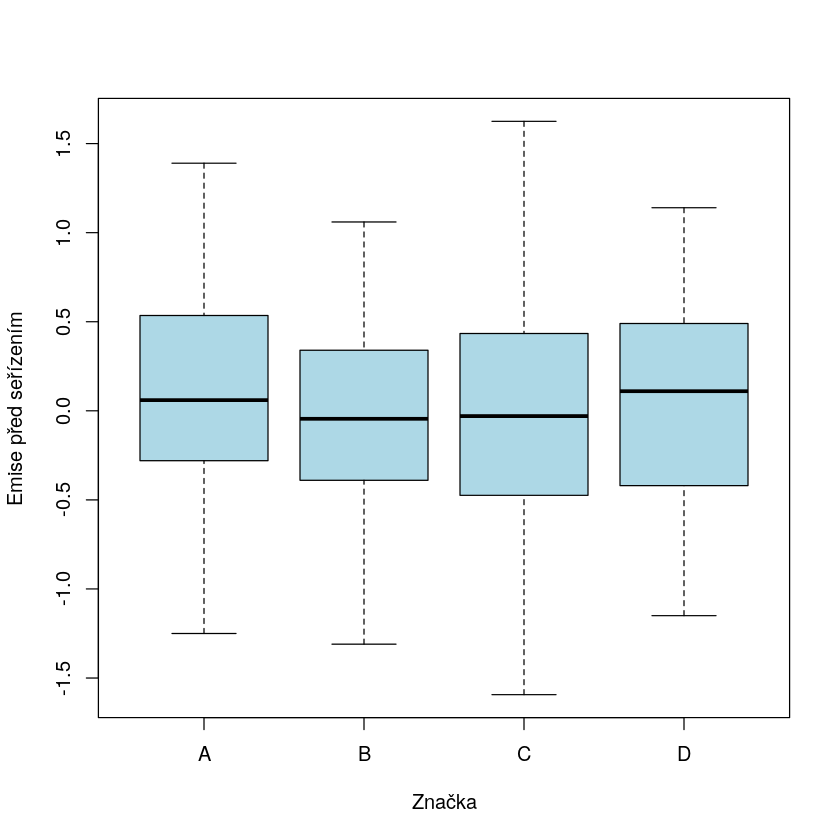

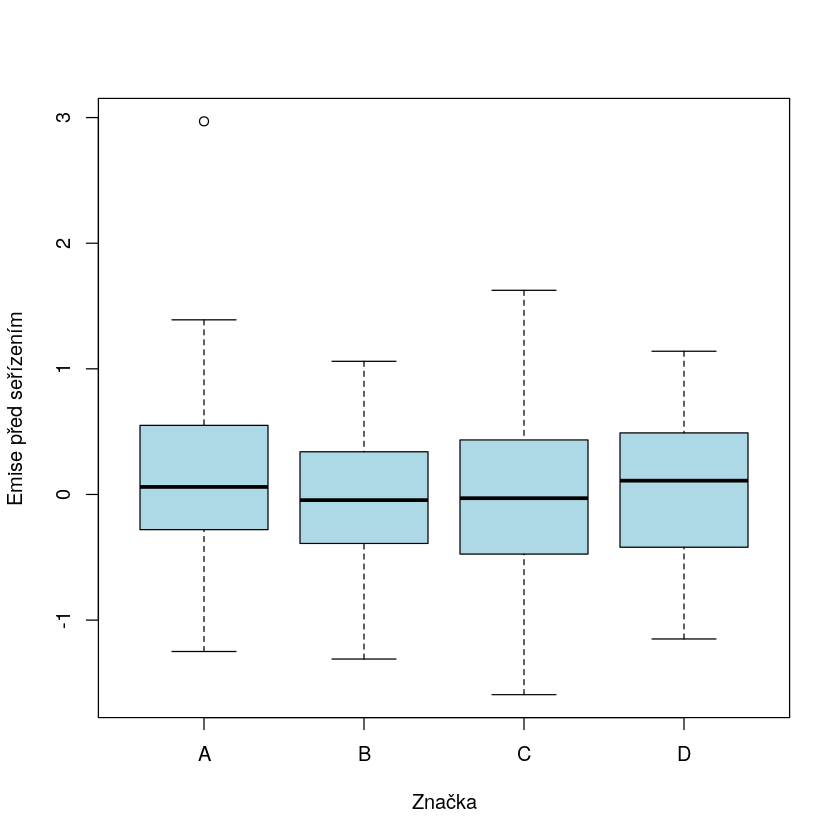

In [30]:
library(dplyr)
# Nastavení náhodného semene pro reprodukovatelnost
set.seed(1)

# Počet motorů pro každou značku
n <- 100

# Generování dat
id <- 1:(4 * n)
odruda <- rep(c("A", "B", "C", "D"), each = n)
vynos_2024 <- round(rnorm(4 * n, mean = 8, sd = 0.6), 2) # emise před seřízením
vynos_2023 <- round(vynos_2024 - rnorm(4 * n, mean = 0.15, sd = 0.5), 2) # emise po seřízení
vynos_2023[odruda == "A"] <- vynos_2023[odruda == "A"] - 0.1 # zvýšení emisí pro značku X
vynos_2023[odruda == "B"] <- vynos_2023[odruda == "B"] + 0.1 # snížení emisí pro značku Y
vynos_2023[odruda == "C"] <- (vynos_2023[odruda == "C"] - 8) * 1.15 + 8 # zvýšení emisí pro značku Z
typ_hnojiva <- sample(c("synteticke", "prirodni"), 4 * n, replace = TRUE, prob = c(0.3, 0.7)) # 10% problémy
vynos_2023[typ_hnojiva == "synteticke"] <- vynos_2023[typ_hnojiva == "synteticke"] + 0.3 # zvýšení emisí pro problémové motory

# Vytvoření data frame
data <- data.frame(
    id = id,
    odruda = odruda,
    vynos_2024 = vynos_2024,
    vynos_2023 = vynos_2023,
    typ_hnojiva = typ_hnojiva
)

# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$vynos_2024 - data$vynos_2023)

for (i in 1:4) {
    outliers <- data %>%
        group_by(odruda) %>%
        rstatix::identify_outliers(zlepseni)

    data$vynos_2024 <- ifelse(data$id %in% outliers$id, 8, data$vynos_2024)
    data$vynos_2023 <- ifelse(data$id %in% outliers$id, 8, data$vynos_2023)
    data <- na.omit(data)
}

data$zlepseni <- (data$vynos_2024 - data$vynos_2023)
boxplot(data$zlepseni ~ data$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

summry <- data %>%
    group_by(odruda) %>%
    summarise(
        num = n(),
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry
bartlett.test(zlepseni ~ odruda, data = data)
kruskal.test(zlepseni ~ odruda, data = data)
dunn.test::dunn.test(data$zlepseni, data$odruda, method = "bonferroni", altp = TRUE)

data$vynos_2023[16] <- 5

data1 <- data
data1$zlepseni <- (data1$vynos_2024 - data1$vynos_2023)
boxplot(data1$zlepseni ~ data1$odruda, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")


In [31]:
data1 <- data1 %>% select(id,odruda,vynos_2023,vynos_2024,typ_hnojiva)
library(openxlsx)

write.xlsx(data1, file = "zk3B.xlsx", rowNames = FALSE)